In [1]:
# Start loading libraries

#! pip install yfinance

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#! pip install pmdarima
import pmdarima as pm
from pmdarima import model_selection

import scipy
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron
from arch.unitroot import KPSS

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_acf

#from matplotlib.ticker import NullFormatter
#import yfinance as yf
#import warnings; warnings.simplefilter('ignore')
#%matplotlib inline

In [2]:
xls_file = pd.ExcelFile("Data_monthly_final.xlsx") # Read Excel
df1=xls_file.parse("WTI") # Read the first sheet (Portfolio holdings)

#df1["Timestamp"] = df1["Date"].astype('datetime64[ns]') # Convert column to date format
df1 = df1.set_index(['Timestamp']) # use first column as index

#df1.to_excel("values.xlsx")  #print to excel


df1.head()

,CLc1,CLc3,CLc6,CLc9,CLc12
Timestamp,,,,,
1983-03-31,29.27,29.05,28.75,NaN,NaN
1983-04-30,30.63,30.57,30.65,NaN,NaN
1983-05-31,30.25,30.05,29.80,NaN,NaN
1983-06-30,31.38,31.21,30.97,NaN,NaN
1983-07-31,32.00,31.87,31.65,NaN,NaN


<AxesSubplot:xlabel='Timestamp'>

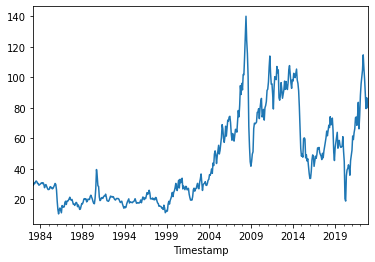

In [3]:
spot = df1["CLc1"]
#spot = np.log(spot).diff()
spot.plot()

In [4]:
#statistics

#mean
#sd
#skewness
#kurtosis
#jb test
#Ljung Box Q(6) and Q^2(6)
#observations

spot.describe()
#spot.dropna().describe()

count    478.000000
mean      44.985314
std       28.912733
min       10.420000
25%       20.300000
50%       31.290000
75%       65.830000
max      140.000000
Name: CLc1, dtype: float64

In [5]:
print("Skewness spot:", scipy.stats.skew(spot.dropna(), axis=0, bias=True))
print("Skewness logs:", scipy.stats.skew(np.log(spot.dropna()), axis=0, bias=True))
print("Kurtosis spot:", scipy.stats.kurtosis(spot.dropna(), axis=0, fisher=False, bias=True))
print("Kurtosis logs:", scipy.stats.kurtosis(np.log(spot.dropna()), fisher=False, axis=0, bias=True))

print("JB spot:", scipy.stats.jarque_bera(spot.dropna()))
print("JB logs:", scipy.stats.jarque_bera(np.log(spot.dropna())))
#The Jarque-Bera Test is typically used for large datasets (n > 2000) in which other normality tests (like the Shapiro-Wilk test) are unreliable.

print("Q(6) spot:", sm.stats.acorr_ljungbox(spot.dropna(), lags=[6]))
print("Q(6) logs:", sm.stats.acorr_ljungbox(np.log(spot.dropna()), lags=[6]))

Skewness spot: 0.8448308154345094
Skewness logs: 0.185054122656068
Kurtosis spot: 2.5708182211237873
Kurtosis logs: 1.7244953137674275
JB spot: Jarque_beraResult(statistic=60.52980573749357, pvalue=7.183142969324763e-14)
JB logs: Jarque_beraResult(statistic=35.13085533049819, pvalue=2.3519695413476427e-08)
Q(6) spot:       lb_stat  lb_pvalue
6  2479.58822        0.0
Q(6) logs:        lb_stat  lb_pvalue
6  2574.453403        0.0


In [6]:
#stationarity

#augmented Dickie-Fuller
#PP test - Phillips and Perron
#KPSS

print("ADF spot:", adfuller(spot.dropna()))
print("ADF logs:", adfuller(np.log(spot.dropna())))

print("PP spot:", PhillipsPerron(spot.dropna()).summary().as_text())
print("PP logs:", PhillipsPerron(np.log(spot.dropna())).summary().as_text())



ADF spot: (-2.213825298679383, 0.20126599039858456, 1, 476, {'1%': -3.444162847239118, '5%': -2.8676311169658177, '10%': -2.5700143303792107}, 2777.39667113665)
ADF logs: (-1.5066481588628446, 0.5302200636738359, 4, 473, {'1%': -3.444250937448703, '5%': -2.867669873870454, '10%': -2.5700349866579657}, -758.6235775092598)
PP spot:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.737
P-value                         0.412
Lags                               18
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
PP logs:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.431
P-value                         0.567
Lags                               18
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process c

In [7]:

print("KPSS spot:", KPSS(spot.dropna()).summary().as_text())
print("KPSS logs:", KPSS(np.log(spot.dropna())).summary().as_text())

KPSS spot:     KPSS Stationarity Test Results   
Test Statistic                  2.402
P-value                         0.000
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
KPSS logs:     KPSS Stationarity Test Results   
Test Statistic                  2.707
P-value                         0.000
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


ACF and PACF spot:
ACF and PACF logs:


c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


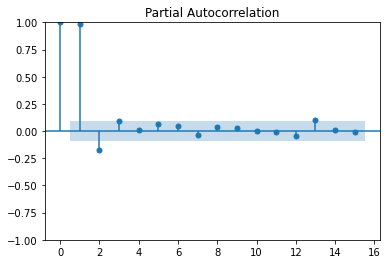

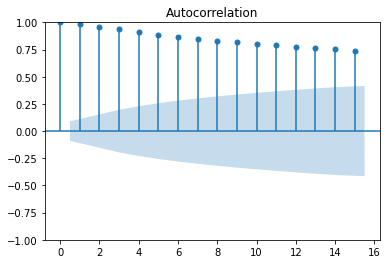

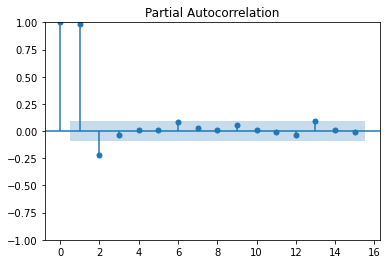

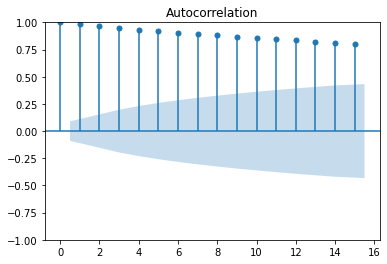

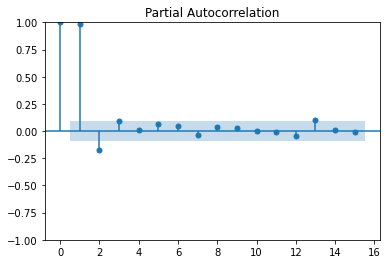

In [8]:
#ACF and PACF

print("ACF and PACF spot:")
plot_acf(spot.dropna(), lags = 15)
plot_pacf(spot.dropna(), lags = 15)


print("ACF and PACF logs:")
plot_acf(np.log(spot.dropna()), lags = 15)
plot_pacf(np.log(spot.dropna()), lags = 15)



0.6782943507735172

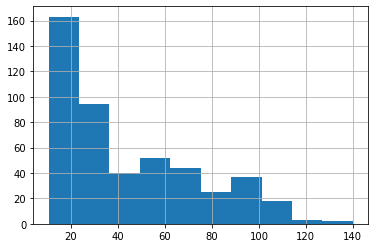

In [9]:
spot.hist()
0.6782943507735172

<AxesSubplot:>

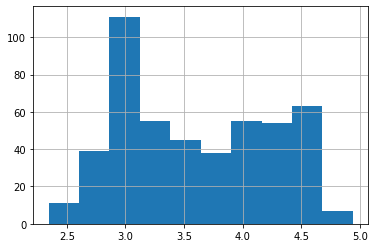

In [10]:
np.log(spot).hist()

In [11]:
# Load the data and split it into separate pieces
data = np.array(spot.dropna())
train, test = model_selection.train_test_split(data, train_size=300)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=1484.613, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1670.979, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1605.693, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=1487.093, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1668.995, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=1486.190, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=1491.022, Time=0.05 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=1488.207, Time=0.08 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=1490.904, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=1497.344, Time=0.05 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=1485.345, Time=0.06 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=1500.015, Time=0.07 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=1492.873, Time=0.07 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1479.823, Time=0.05 sec
 ARIMA(1,2,2)(0,0,0)[0]          

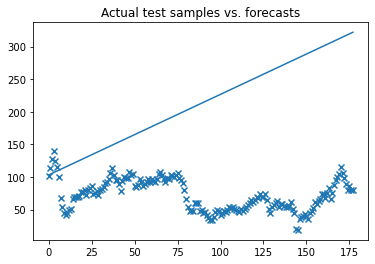

In [12]:
# Fit a simple auto_arima model
arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x = np.arange(test.shape[0])
plt.scatter(x, test, marker='x')
plt.plot(x, arima.predict(n_periods=test.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [13]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  300
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -736.155
Date:                Tue, 27 Dec 2022   AIC                           1476.309
Time:                        18:36:26   BIC                           1483.703
Sample:                             0   HQIC                          1479.269
                                - 300                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9735      0.013    -72.673      0.000      -1.000      -0.947
sigma2         8.0768      0.439     18.396      0.000       7.216       8.937
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                85.20
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               2.80   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

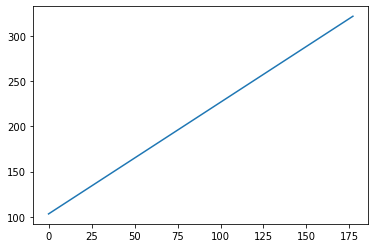

In [14]:
plt.plot(x, arima.predict(n_periods=test.shape[0]))

In [15]:
arima.predict(n_periods=test.shape[0])

array([103.0767773 , 104.31355459, 105.55033189, 106.78710919,
       108.02388648, 109.26066378, 110.49744108, 111.73421838,
       112.97099567, 114.20777297, 115.44455027, 116.68132756,
       117.91810486, 119.15488216, 120.39165945, 121.62843675,
       122.86521405, 124.10199134, 125.33876864, 126.57554594,
       127.81232324, 129.04910053, 130.28587783, 131.52265513,
       132.75943242, 133.99620972, 135.23298702, 136.46976431,
       137.70654161, 138.94331891, 140.1800962 , 141.4168735 ,
       142.6536508 , 143.8904281 , 145.12720539, 146.36398269,
       147.60075999, 148.83753728, 150.07431458, 151.31109188,
       152.54786917, 153.78464647, 155.02142377, 156.25820106,
       157.49497836, 158.73175566, 159.96853296, 161.20531025,
       162.44208755, 163.67886485, 164.91564214, 166.15241944,
       167.38919674, 168.62597403, 169.86275133, 171.09952863,
       172.33630592, 173.57308322, 174.80986052, 176.04663782,
       177.28341511, 178.52019241, 179.75696971, 180.99

<AxesSubplot:xlabel='Timestamp'>

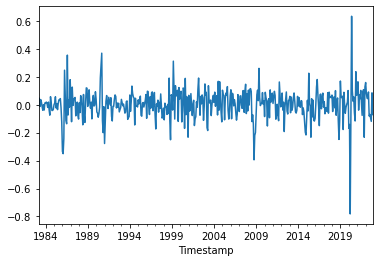

In [16]:
spot2 = np.log(spot).diff()
spot2.plot()

In [17]:
#statistics

#mean
#sd
#skewness
#kurtosis
#jb test
#Ljung Box Q(6) and Q^2(6)
#observations

spot2.describe()
#spot.dropna().describe()

count    477.000000
mean       0.002107
std        0.105630
min       -0.781866
25%       -0.053110
50%        0.009248
75%        0.062300
max        0.633269
Name: CLc1, dtype: float64

In [18]:
print("Skewness spot:", scipy.stats.skew(spot2.dropna(), axis=0, bias=True))
#print("Skewness logs:", scipy.stats.skew(np.log(spot2.dropna()), axis=0, bias=True))
print("Kurtosis spot:", scipy.stats.kurtosis(spot2.dropna(), axis=0, fisher=False, bias=True))
#print("Kurtosis logs:", scipy.stats.kurtosis(np.log(spot2.dropna()), fisher=False, axis=0, bias=True))

print("JB spot:", scipy.stats.jarque_bera(spot2.dropna()))
#print("JB logs:", scipy.stats.jarque_bera(np.log(spot2.dropna())))
#The Jarque-Bera Test is typically used for large datasets (n > 2000) in which other normality tests (like the Shapiro-Wilk test) are unreliable.

print("Q(6) spot:", sm.stats.acorr_ljungbox(spot2.dropna(), lags=[6]))
#print("Q(6) logs:", sm.stats.acorr_ljungbox(np.log(spot2.dropna()), lags=[6]))

Skewness spot: -0.5764401660759515
Kurtosis spot: 12.295013196277413
JB spot: Jarque_beraResult(statistic=1743.5622671622755, pvalue=0.0)
Q(6) spot:      lb_stat  lb_pvalue
6  24.198427    0.00048


In [19]:
#stationarity

#augmented Dickie-Fuller
#PP test - Phillips and Perron
#KPSS

print("ADF spot:", adfuller(spot2.dropna()))
#print("ADF logs:", adfuller(np.log(spot2.dropna())))

print("PP spot:", PhillipsPerron(spot2.dropna()).summary().as_text())
#print("PP logs:", PhillipsPerron(np.log(spot2.dropna())).summary().as_text())

ADF spot: (-12.115572041037499, 1.8758894462155855e-22, 3, 473, {'1%': -3.444250937448703, '5%': -2.867669873870454, '10%': -2.5700349866579657}, -755.8347873383541)
PP spot:      Phillips-Perron Test (Z-tau)    
Test Statistic                -18.510
P-value                         0.000
Lags                               18
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [20]:
print("KPSS spot:", KPSS(spot2.dropna()).summary().as_text())
#print("KPSS logs:", KPSS(np.log(spot2.dropna())).summary().as_text())

KPSS spot:     KPSS Stationarity Test Results   
Test Statistic                  0.047
P-value                         0.897
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


ACF and PACF spot:


c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


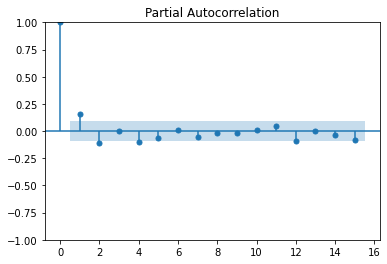

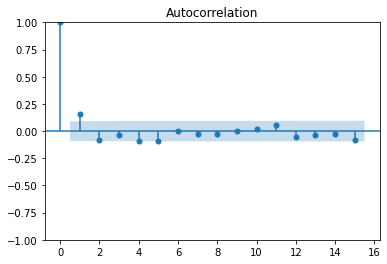

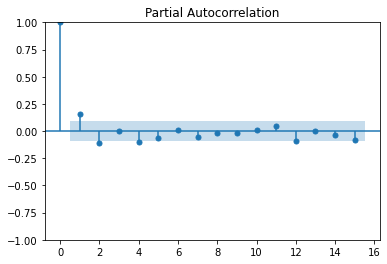

In [21]:
#ACF and PACF

print("ACF and PACF spot:")
plot_acf(spot2.dropna(), lags = 15)
plot_pacf(spot2.dropna(), lags = 15)


#print("ACF and PACF logs:")
#plot_acf(np.log(spot2.dropna()), lags = 15)
#plot_pacf(np.log(spot2.dropna()), lags = 15)


<AxesSubplot:>

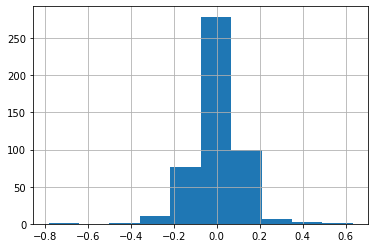

In [22]:
spot2.hist()


In [23]:
# Load the data and split it into separate pieces
data2 = np.array(spot2.dropna())
train2, test2 = model_selection.train_test_split(data2, train_size=300)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-567.884, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-568.780, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-570.062, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-570.883, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-571.199, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-569.860, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-570.444, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-572.096, Time=0.03 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-570.096, Time=0.04 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-569.329, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-570.676, Time=0.04 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0]          
Total fit time: 0.368 seconds


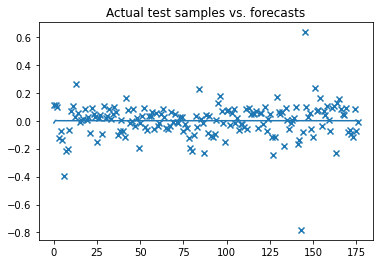

In [24]:
# Fit a simple auto_arima model
arima2 = pm.auto_arima(train2, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x2 = np.arange(test2.shape[0])
plt.scatter(x2, test2, marker='x')
plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [25]:
arima2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  300
Model:               SARIMAX(0, 0, 2)   Log Likelihood                 289.048
Date:                Tue, 27 Dec 2022   AIC                           -572.096
Time:                        18:36:28   BIC                           -560.984
Sample:                             0   HQIC                          -567.649
                                - 300                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1177      0.040      2.927      0.003       0.039       0.197
ma.L2         -0.1072      0.046     -2.351      0.019      -0.197      -0.018
sigma2         0.0085      0.000     17.208      0.000       0.008       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                63.17
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             0.13
Prob(H) (two-sided):                  0.07   Kurtosis:                         5.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

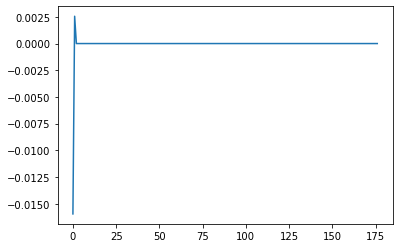

In [26]:
plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))

In [27]:
arima2.predict(n_periods=test2.shape[0])

array([-0.01595517,  0.0025575 ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [28]:
#cointegration tests

#normalized cv
#LR test

In [29]:
#correlaatiomatriisi

In [30]:
#np.argwhere(np.isnan(x))